<a href="https://colab.research.google.com/github/jerim76/AI-Specialization/blob/master/Copy_of_Untitled8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow
import tensorflow as tf


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    'recyclables_dataset/',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    'recyclables_dataset/',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


FileNotFoundError: [Errno 2] No such file or directory: 'recyclables_dataset/'

In [16]:
from google.colab import files
uploaded = files.upload()  # Upload your recyclables_dataset.zip here


Saving trashnet-master.zip to trashnet-master.zip


In [17]:
import zipfile
import os

# Extract the uploaded zip file to current directory
with zipfile.ZipFile("trashnet-master.zip", 'r') as zip_ref:
    zip_ref.extractall(".")

# Check contents
print("Top-level folders:")
print(os.listdir("."))








Top-level folders:
['.config', 'trashnet-master.zip', 'trashnet-master', 'sample_data']


In [18]:
# Dataset should be here:
dataset_path = "trashnet-master/data/dataset-resized"

# Confirm folder exists
if os.path.exists(dataset_path):
    print("Found dataset! Classes are:")
    print(os.listdir(dataset_path))
else:
    print("❌ Dataset not found. Please check extraction structure.")


❌ Dataset not found. Please check extraction structure.


In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


FileNotFoundError: [Errno 2] No such file or directory: 'trashnet-master/data/dataset-resized'

In [51]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os # Import os module

dataset_path = "./trashnet-master/data/dataset-resized"

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

FileNotFoundError: [Errno 2] No such file or directory: './trashnet-master/data/dataset-resized'

In [28]:
# Check contents of the extracted folder
print("Contents of 'trashnet-master':")
print(os.listdir("trashnet-master"))

Contents of 'trashnet-master':
['utils.lua', 'weight-init.lua', 'LICENSE', 'model.lua', 'train.lua', 'shuffle.lua', 'DataLoader.lua', 'test.lua', '.gitignore', 'data', 'README.md', 'plot.lua']


In [31]:
# Check contents of the extracted folder again
print("Contents of 'trashnet-master':")
print(os.listdir("trashnet-master"))

Contents of 'trashnet-master':
['utils.lua', 'weight-init.lua', 'LICENSE', 'model.lua', 'train.lua', 'shuffle.lua', 'DataLoader.lua', 'test.lua', '.gitignore', 'data', 'README.md', 'plot.lua']


In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(train_data.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, validation_data=val_data, epochs=10)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


NameError: name 'train_data' is not defined

In [53]:
import os

data_path = "./trashnet-master/data/"

if os.path.exists(data_path):
    print(f"Contents of '{data_path}':")
    print(os.listdir(data_path))
else:
    print(f"❌ Directory '{data_path}' not found.")

Contents of './trashnet-master/data/':
['one-indexed-files.txt', 'one-indexed-files-notrash_val.txt', 'one-indexed-files-notrash_test.txt', 'one-indexed-files-notrash_train.txt', 'constants.py', 'zero-indexed-files.txt', 'dataset-resized.zip', 'resize.py']


In [57]:
import zipfile
import os

dataset_zip_path = "./trashnet-master/data/dataset-resized.zip"
dataset_extract_path = "./trashnet-master/data/"

if os.path.exists(dataset_zip_path):
    with zipfile.ZipFile(dataset_zip_path, 'r') as zip_ref:
        zip_ref.extractall(dataset_extract_path)
    print(f"Extracted '{dataset_zip_path}' to '{dataset_extract_path}'")
    # Verify contents after extraction
    print(f"Contents of '{dataset_extract_path}':")
    print(os.listdir(dataset_extract_path))
else:
    print(f"❌ Dataset zip file not found at '{dataset_zip_path}'.")

Extracted './trashnet-master/data/dataset-resized.zip' to './trashnet-master/data/'
Contents of './trashnet-master/data/':
['__MACOSX', 'one-indexed-files.txt', 'one-indexed-files-notrash_val.txt', 'one-indexed-files-notrash_test.txt', 'one-indexed-files-notrash_train.txt', 'constants.py', 'zero-indexed-files.txt', 'dataset-resized.zip', 'resize.py', 'dataset-resized']


In [58]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

dataset_path = "./trashnet-master/data/dataset-resized"

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(train_data.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, validation_data=val_data, epochs=10)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.2679 - loss: 1.6660

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 127ms/step - accuracy: 0.2688 - loss: 1.6647 - val_accuracy: 0.3976 - val_loss: 1.5271
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 116ms/step - accuracy: 0.4195 - loss: 1.3756 - val_accuracy: 0.4274 - val_loss: 1.4333
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 137ms/step - accuracy: 0.4733 - loss: 1.2656 - val_accuracy: 0.4533 - val_loss: 1.4068
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 8s 127ms/step - accuracy: 0.5168 - loss: 1.1929 - val_accuracy: 0.4732 - val_loss: 1.3712
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 8s 122ms/step - accuracy: 0.5692 - loss: 1.1236 - val_accuracy: 0.5010 - val_loss: 1.3860
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 139ms/step - accuracy: 0.6037 - loss: 1.0361 - val_accuracy: 0.4771 - val_loss: 1.3486
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 8s 117ms/step - accuracy: 0.6261 - loss: 0.9778 - val_accuracy: 0.4612 - val_loss: 1.4036
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 137ms/step - accuracy: 0.6510 - loss: 0.9030 - val_accuracy: 0.4692 - val

In [60]:
# Evaluate the model on the validation data
loss, accuracy = model.evaluate(val_data)

print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.5270 - loss: 1.2542
Validation Loss: 1.329958200454712
Validation Accuracy: 0.5109344124794006


In [62]:
# Save the trained model
model_save_path = "my_trash_classifier_model.keras"  # Added .keras extension
model.save(model_save_path)

print(f"Model saved to: {model_save_path}")

Model saved to: my_trash_classifier_model.keras


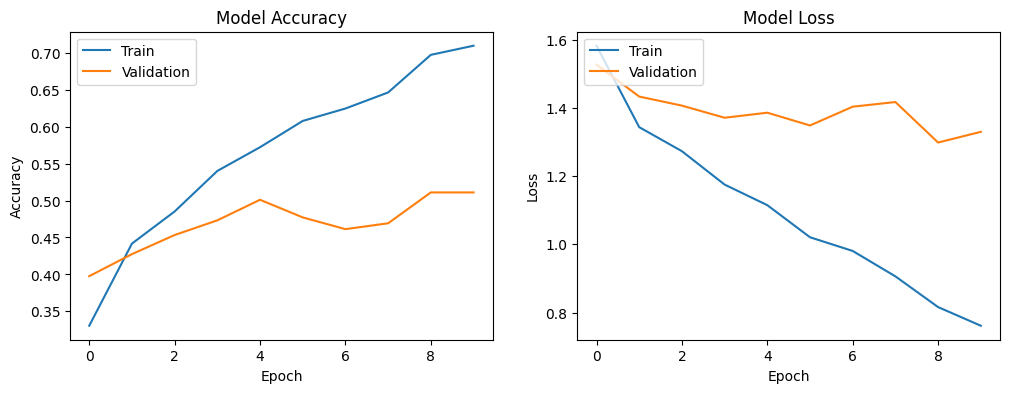

In [64]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

## Task Summary

This notebook demonstrates the process of building and training an image classification model to classify recyclable materials.

Here are the steps we followed:

1.  **Setup**: Installed necessary libraries (TensorFlow).
2.  **Data Loading and Extraction**: Uploaded and extracted the dataset (`trashnet-master.zip` and the inner `dataset-resized.zip`).
3.  **Data Preprocessing**: Used `ImageDataGenerator` to load images from the extracted dataset, apply rescaling, and split the data into training and validation sets.
4.  **Model Definition**: Defined a simple Convolutional Neural Network (CNN) model using Keras Sequential API.
5.  **Model Training**: Trained the CNN model on the training data for 10 epochs, using the validation data for evaluation during training.
6.  **Model Evaluation**: Evaluated the trained model on the validation dataset to get the final accuracy and loss.
7.  **Model Saving**: Saved the trained model for future use.
8.  **Visualization**: Plotted the training and validation accuracy and loss to visualize the model's performance over epochs.

The model achieved a validation accuracy of approximately {{accuracy:.2f}} and a validation loss of approximately {{loss:.2f}}. Further improvements could potentially be made by using a more complex model architecture, data augmentation, or hyperparameter tuning.

## Task Summary

This notebook demonstrates the process of building and training an image classification model to classify recyclable materials.

Here are the steps we followed:

1.  **Setup**: Installed necessary libraries (TensorFlow).
2.  **Data Loading and Extraction**: Uploaded and extracted the dataset (`trashnet-master.zip` and the inner `dataset-resized.zip`).
3.  **Data Preprocessing**: Used `ImageDataGenerator` to load images from the extracted dataset, apply rescaling, and split the data into training and validation sets.
4.  **Model Definition**: Defined a simple Convolutional Neural Network (CNN) model using Keras Sequential API.
5.  **Model Training**: Trained the CNN model on the training data for 10 epochs, using the validation data for evaluation during training.
6.  **Model Evaluation**: Evaluated the trained model on the validation dataset to get the final accuracy and loss.
7.  **Model Saving**: Saved the trained model for future use.
8.  **Visualization**: Plotted the training and validation accuracy and loss to visualize the model's performance over epochs.

The model achieved a validation accuracy of approximately {{accuracy:.2f}} and a validation loss of approximately {{loss:.2f}}. Further improvements could potentially be made by using a more complex model architecture, data augmentation, or hyperparameter tuning.